In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Payal Kumari\OneDrive\Desktop\EDA project\data-export (1) (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [3]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [4]:
df.columns=["channel group","datehour","users","sessions","engaged sessions","average engagement time per session","engaged session per user","event per session","engagement rate","event count"]
df.head()

,channel group,datehour,users,sessions,engaged sessions,average engagement time per session,engaged session per user,event per session,engagement rate,event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
df['datehour']=pd.to_datetime(df['datehour'],format='%Y%m%d%H')
df.dtypes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   object        
 3   sessions                             3182 non-null   object        
 4   engaged sessions                     3182 non-null   object        
 5   average engagement time per session  3182 non-null   object        
 6   engaged session per user             3182 non-null   object        
 7   event per session                    3182 non-null   object        
 8   engagement rate                      3182 non-null   object        
 9   event count                          3182 non-null   object        
dtypes: datetime6

,channel group,datehour,users,sessions,engaged sessions,average engagement time per session,engaged session per user,event per session,engagement rate,event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
numeric_cols=df.columns.drop(["channel group","datehour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["hour"]=df['datehour'].dt.hour
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   engaged sessions                     3182 non-null   int64         
 5   average engagement time per session  3182 non-null   float64       
 6   engaged session per user             3182 non-null   float64       
 7   event per session                    3182 non-null   float64       
 8   engagement rate                      3182 non-null   float64       
 9   event count                          3182 non-null   int64         
 10  hour        

In [7]:
df.describe()

,datehour,users,sessions,engaged sessions,average engagement time per session,engaged session per user,event per session,engagement rate,event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


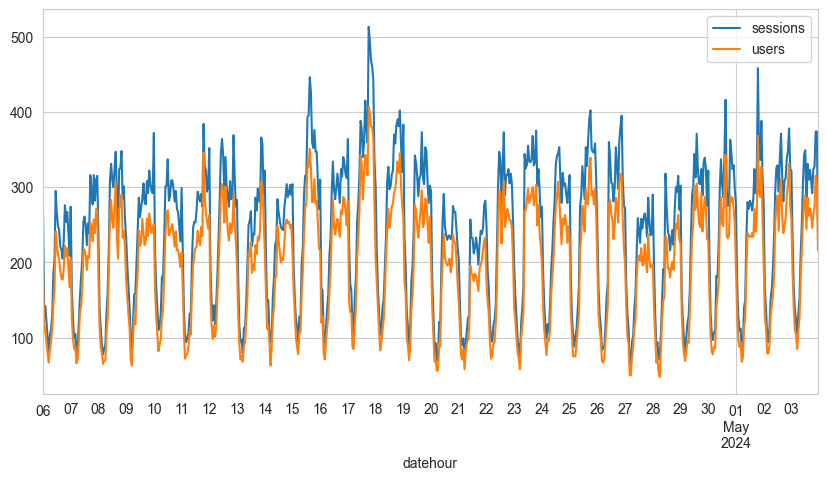

In [ ]:
## Q1. what patterns or trends can you observe in website session and user over time?   
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
df.groupby('datehour')[['sessions',"users"]].sum().plot(ax=plt.gca())
plt.title("session and user over time")
plt.show()

C:\Users\Payal Kumari\AppData\Local\Temp\ipykernel_25764\2833342814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="users",estimator=np.sum,palette='pastel')


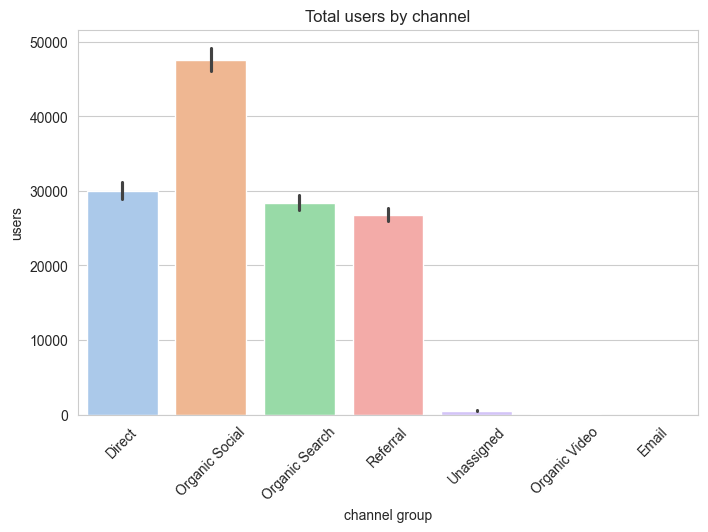

In [14]:
##total users by channel group
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="channel group",y="users",estimator=np.sum,palette='pastel')
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

C:\Users\Payal Kumari\AppData\Local\Temp\ipykernel_25764\3941101745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="average engagement time per session",estimator=np.mean,palette='magma')


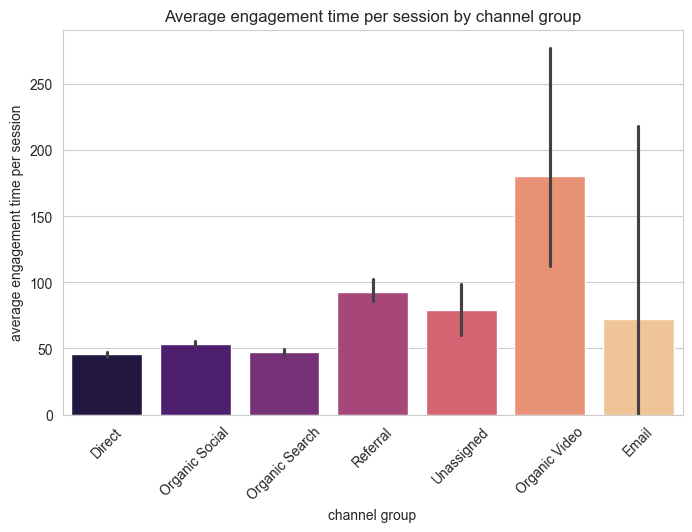

In [15]:
##which channel group has the highest average engagement time,and what does that tell us about user behavior and content effectiveness?
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="channel group",y="average engagement time per session",estimator=np.mean,palette='magma')
plt.title("Average engagement time per session by channel group")
plt.xticks(rotation=45)
plt.show()

C:\Users\Payal Kumari\AppData\Local\Temp\ipykernel_25764\3549159314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="channel group",y="engagement rate",palette='Set2')


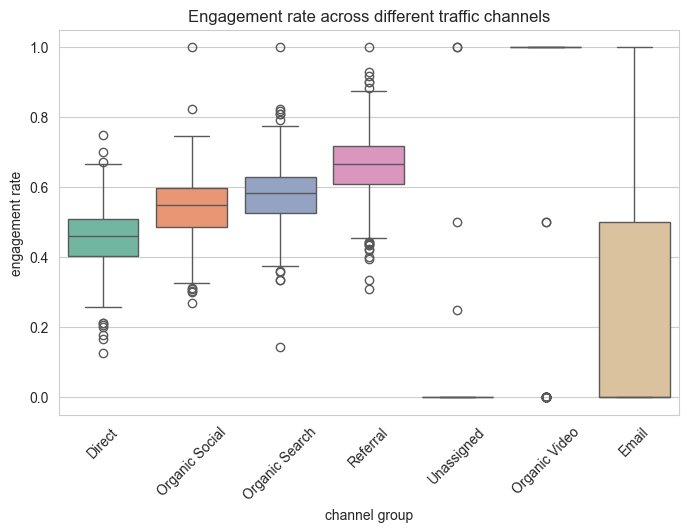

In [16]:
##how does the engagement rate vary across different traffic channels?
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="channel group",y="engagement rate",palette='Set2')
plt.title("Engagement rate across different traffic channels")
plt.xticks(rotation=45)
plt.show()

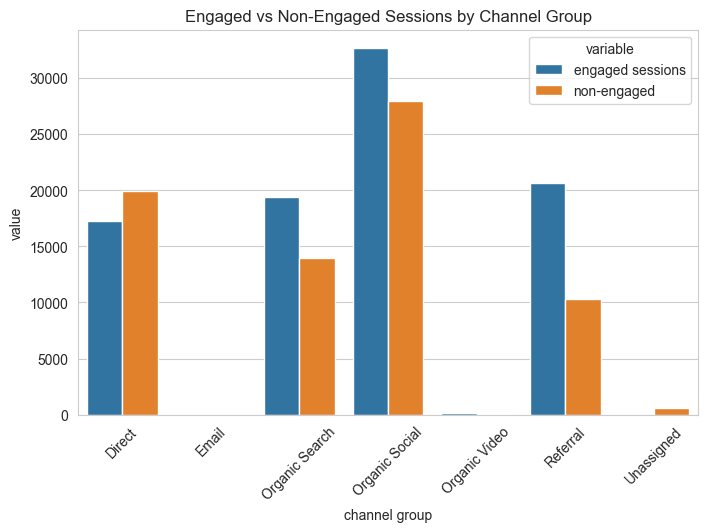

In [18]:
##which channel are driving more engaged sessions compared to non-engaged ones,and what strategies can  improve engagement in underperforming channels?
session_df=df.groupby(['channel group'])[['engaged sessions','sessions']].sum().reset_index()
session_df["non-engaged"]=session_df["sessions"]-session_df["engaged sessions"]
session_df_melted=session_df.melt(id_vars='channel group',value_vars=['engaged sessions','non-engaged'])
plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted,x="channel group",y="value",hue="variable")
plt.title("Engaged vs Non-Engaged Sessions by Channel Group")
plt.xticks(rotation=45)
plt.show()

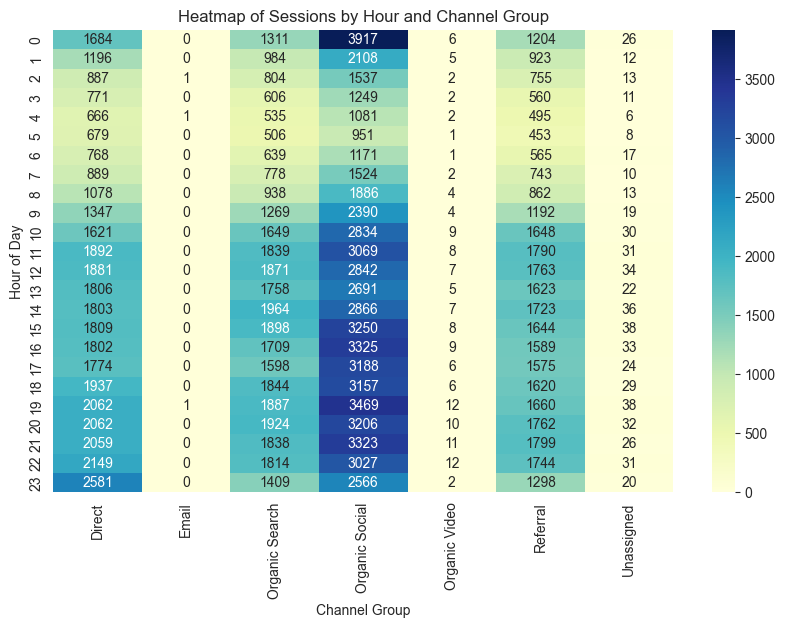

In [20]:
##at what hour of the day does each channel drive the most traffic?
heatmap_data=df.groupby(['hour','channel group'])['sessions'].sum().unstack().fillna(0)     

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,annot=True,fmt=".0f",cmap='YlGnBu',)
plt.title("Heatmap of Sessions by Hour and Channel Group")  
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

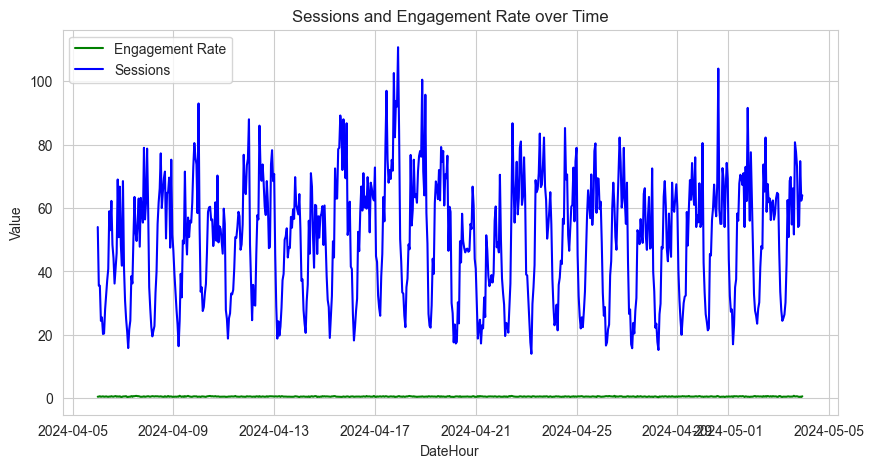

In [21]:
##is there any corrwlation between hhigh traffic (sessions) and high engagement rate over time?
df_plot=df.groupby('datehour')[['sessions','engagement rate']].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_plot["datehour"],df_plot["engagement rate"],label="Engagement Rate",color='green')
plt.plot(df_plot["datehour"],df_plot["sessions"],label="Sessions",color='blue')
plt.title("Sessions and Engagement Rate over Time")     
plt.xlabel("DateHour")
plt.ylabel("Value") 
plt.legend()
plt.show()